<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [279]:
from sklearn.metrics import roc_auc_score

In [229]:
y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [280]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [281]:
data = pd.read_csv('./train.csv')

In [160]:
data.shape

(5282, 20)

In [161]:
# 1) Посмотрите на случайные строчки
data.sample(15)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4759,20,55.00,1165.55,Male,0,No,No,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),0
4432,62,81.00,4985.9,Female,0,Yes,No,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Mailed check,0
4389,24,21.05,531.55,Female,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),0
2608,29,84.45,2467.1,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,1
777,56,19.80,1119.9,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),0
2177,9,44.95,431,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,1
1554,41,86.20,3339.05,Female,0,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Bank transfer (automatic),0
4379,3,55.35,165.2,Female,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,1
2890,53,60.45,3184.25,Male,0,Yes,No,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,1
5131,52,39.10,1982.1,Female,0,No,No,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,0


In [162]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [130]:
data.nunique()

ClientPeriod                  73
MonthlySpending             1468
TotalSpent                  4978
Sex                            2
IsSeniorCitizen                2
HasPartner                     2
HasChild                       2
HasPhoneService                2
HasMultiplePhoneNumbers        3
HasInternetService             3
HasOnlineSecurityService       3
HasOnlineBackup                3
HasDeviceProtection            3
HasTechSupportAccess           3
HasOnlineTV                    3
HasMovieSubscription           3
HasContractPhone               3
IsBillingPaperless             2
PaymentMethod                  4
Churn                          2
dtype: int64

In [282]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [283]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [284]:
# TotalSpent имеет тип object. Надо стелать из него float64. Есть значения в виде пробелов, заменим их на NaN
data['TotalSpent'] = data.TotalSpent.replace(' ', np.nan)
data['TotalSpent'] = data.TotalSpent.astype('float64')
# IsSeniorCitizen из числового типа переведем в строчный
data.loc[:, 'IsSeniorCitizen'] = data.IsSeniorCitizen.astype('str')

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [286]:
# 2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, 
# если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.
# YOUR CODE
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [287]:
# заменим nan'ы в колонке TotalSpent на среднее значение по этой колонке 
data['TotalSpent'].fillna(value=data.TotalSpent.mean(), inplace=True)

In [288]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## 2. Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [240]:
len(num_cols), len(cat_cols)

(3, 16)

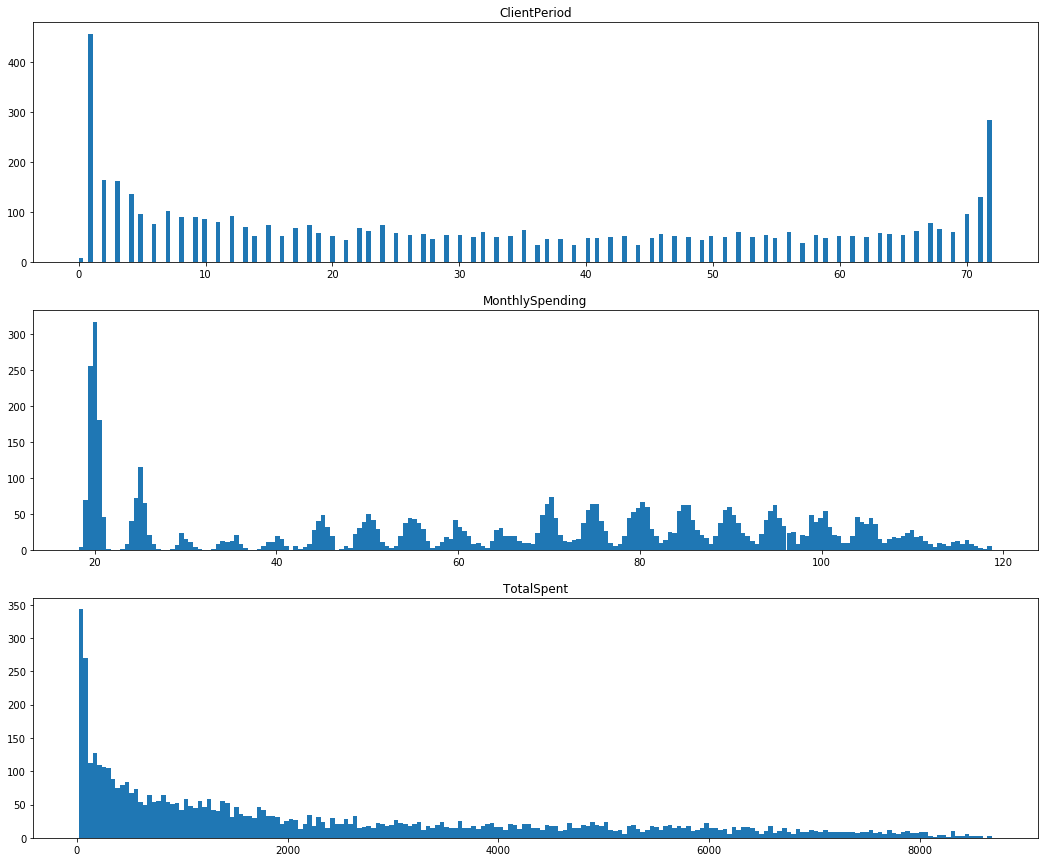

In [244]:
# 1) Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...))...
# (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).

# YOUR CODE

# гистограммы для числовых признаки

fig, axes = plt.subplots(3, figsize=(18, 15))
    
for j in range(3):
    axes[j].set_title(f'{num_cols[j]}')
    axes[j].hist(data[num_cols[j]], bins=200)

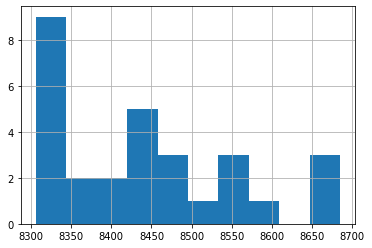

In [245]:
data[data.TotalSpent > 8300].TotalSpent.hist();

Особых выбросов на гистограммах не видно

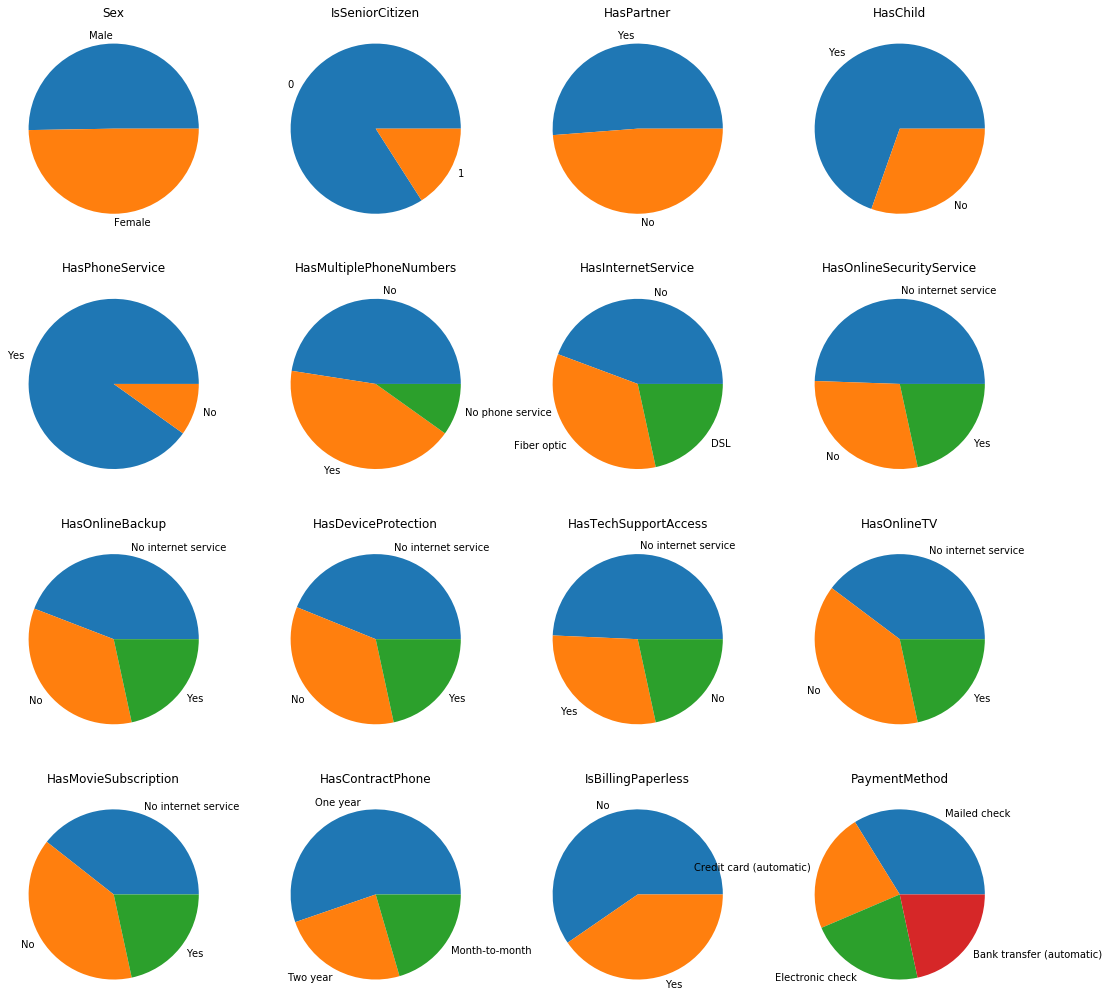

In [243]:
# 1) ... 
# Для категориальных посчитайте количество каждого значения для каждого признака. 
# Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) 
# или круговые диаграммы plt.pie(...) 
# (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).

fig, axes = plt.subplots(4, 4, figsize=(18, 18))

for i in range(4):
    for j in range(4):
        axes[i, j].set_title(f'{cat_cols[4 * i + j]}')
        axes[i, j].pie(data[cat_cols[4 * i + j]].value_counts(), 
                       labels=data[cat_cols[4 * i + j]].unique())
    

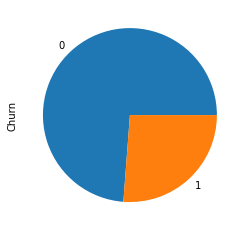

In [246]:
# 2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.
data.Churn.value_counts().plot(kind='pie');

Дисбаланс есть, но не слишком большой

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [110]:
# YOUR CODE

## 3. Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [290]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
# YOUR CODE

In [291]:
numeric_data = data[num_cols]
categorial_data = data[cat_cols]

In [183]:
categorial_data.nunique()

Sex                         2
IsSeniorCitizen             2
HasPartner                  2
HasChild                    2
HasPhoneService             2
HasMultiplePhoneNumbers     3
HasInternetService          3
HasOnlineSecurityService    3
HasOnlineBackup             3
HasDeviceProtection         3
HasTechSupportAccess        3
HasOnlineTV                 3
HasMovieSubscription        3
HasContractPhone            3
IsBillingPaperless          2
PaymentMethod               4
dtype: int64

In [184]:
categorial_data.nunique().sum()
# столько колонок будет после one-hot-encoding

43

In [292]:
# 1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. 
# Т.е. ... категориальные закодируйте с помощью one-hot-encoding'а.
dummy_features = pd.get_dummies(categorial_data)

In [293]:
dummy_features.head()

,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,0,1,1,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
4,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [294]:
# опять создаем единый датафрейм из числовых и категориальных признаков
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,HasChild_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0


In [295]:
# вектор "ответов"
y = data['Churn']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

In [296]:
X.shape

(5282, 46)

In [297]:
# разделяем на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [298]:
# 1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. 
# Т.е. отнормируйте числовые признаки...

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# обучили StandardScaler только на тестовых данных, не допуская утечки валидационных данных в модель
X_test_scaled = scaler.transform(X_test)

Попробуем обучить модель логистической регрессии

In [299]:
# 2) С помощью кроссвалидации или разделения на train/valid выборку 
# протестируйте разные значения гиперпараметра C и выберите лучший 
# (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

model = LogisticRegressionCV(Cs=[100., 10., 1., 0.1, 0.01, 0.001], cv=5, scoring='roc_auc', refit=True)
# [100., 10., 1., 0.1, 0.01, 0.001]

In [300]:
model.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=[100.0, 10.0, 1.0, 0.1, 0.01, 0.001], class_weight=None,
                     cv=5, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring='roc_auc',
                     solver='lbfgs', tol=0.0001, verbose=0)

In [251]:
y_pred = model.predict(X_test_scaled)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [252]:
roc_auc_score(y_test, y_pred)

0.6828529474238324

In [196]:
model.C_

array([10.])

In [302]:
# надо использовать именно predict_proba, а не predict
y_pred = model.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_pred)

0.8270472197338405

## 4. Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

In [309]:
# !pip install catboost

In [253]:
import catboost

In [254]:
X_origin = data.iloc[:, :-1]

X_origin.sample(20)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
1605,11,66.35,740.80,Female,0,Yes,Yes,Yes,Yes,DSL,No,No,No,Yes,No,Yes,Month-to-month,Yes,Electronic check
4151,66,115.80,7942.15,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic)
4946,42,73.90,3160.55,Female,0,No,No,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic)
2748,2,44.60,97.10,Female,0,Yes,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check
3155,1,69.15,69.15,Male,0,Yes,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
5147,17,19.40,358.05,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
497,16,19.75,284.35,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1895,72,80.45,5737.60,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Two year,No,Bank transfer (automatic)
2433,9,65.00,663.05,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Month-to-month,No,Mailed check
1517,7,64.20,475.00,Male,1,Yes,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Electronic check


In [255]:
X_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   object 
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [256]:
# 1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [262]:
boosting_model_standart = catboost.CatBoostClassifier(cat_features=np.arange(3, 19))
boosting_model_standart.fit(X_train_origin, y_train)
y_test_predicted = boosting_model_standart.predict_proba(X_test_origin)[:, 1]
roc_auc_score(y_test, y_test_predicted)

Learning rate set to 0.019062
0:	learn: 0.6798235	total: 88.1ms	remaining: 1m 27s
1:	learn: 0.6678838	total: 193ms	remaining: 1m 36s
2:	learn: 0.6553717	total: 237ms	remaining: 1m 18s
3:	learn: 0.6436579	total: 320ms	remaining: 1m 19s
4:	learn: 0.6327481	total: 365ms	remaining: 1m 12s
5:	learn: 0.6226224	total: 412ms	remaining: 1m 8s
6:	learn: 0.6129001	total: 459ms	remaining: 1m 5s
7:	learn: 0.6048809	total: 482ms	remaining: 59.7s
8:	learn: 0.5958406	total: 530ms	remaining: 58.4s
9:	learn: 0.5883910	total: 560ms	remaining: 55.4s
10:	learn: 0.5809757	total: 615ms	remaining: 55.3s
11:	learn: 0.5733126	total: 658ms	remaining: 54.2s
12:	learn: 0.5653814	total: 725ms	remaining: 55s
13:	learn: 0.5583120	total: 773ms	remaining: 54.4s
14:	learn: 0.5511840	total: 817ms	remaining: 53.6s
15:	learn: 0.5446393	total: 871ms	remaining: 53.6s
16:	learn: 0.5384137	total: 927ms	remaining: 53.6s
17:	learn: 0.5330084	total: 971ms	remaining: 53s
18:	learn: 0.5272790	total: 1.01s	remaining: 52.4s
19:	learn

162:	learn: 0.3898422	total: 7.93s	remaining: 40.8s
163:	learn: 0.3895730	total: 7.98s	remaining: 40.7s
164:	learn: 0.3893730	total: 8.06s	remaining: 40.8s
165:	learn: 0.3892730	total: 8.13s	remaining: 40.9s
166:	learn: 0.3890447	total: 8.18s	remaining: 40.8s
167:	learn: 0.3888812	total: 8.23s	remaining: 40.8s
168:	learn: 0.3888501	total: 8.25s	remaining: 40.6s
169:	learn: 0.3887413	total: 8.34s	remaining: 40.7s
170:	learn: 0.3886993	total: 8.38s	remaining: 40.6s
171:	learn: 0.3885325	total: 8.44s	remaining: 40.6s
172:	learn: 0.3884415	total: 8.49s	remaining: 40.6s
173:	learn: 0.3884364	total: 8.52s	remaining: 40.5s
174:	learn: 0.3883125	total: 8.58s	remaining: 40.5s
175:	learn: 0.3882903	total: 8.61s	remaining: 40.3s
176:	learn: 0.3882444	total: 8.66s	remaining: 40.3s
177:	learn: 0.3881398	total: 8.72s	remaining: 40.3s
178:	learn: 0.3879987	total: 8.77s	remaining: 40.2s
179:	learn: 0.3878332	total: 8.81s	remaining: 40.2s
180:	learn: 0.3876515	total: 8.88s	remaining: 40.2s
181:	learn: 

321:	learn: 0.3746547	total: 15.9s	remaining: 33.5s
322:	learn: 0.3745641	total: 15.9s	remaining: 33.4s
323:	learn: 0.3743936	total: 16s	remaining: 33.4s
324:	learn: 0.3742873	total: 16s	remaining: 33.3s
325:	learn: 0.3742400	total: 16.1s	remaining: 33.3s
326:	learn: 0.3742205	total: 16.1s	remaining: 33.2s
327:	learn: 0.3740204	total: 16.2s	remaining: 33.2s
328:	learn: 0.3738618	total: 16.2s	remaining: 33.1s
329:	learn: 0.3736282	total: 16.3s	remaining: 33.1s
330:	learn: 0.3734606	total: 16.3s	remaining: 33s
331:	learn: 0.3733365	total: 16.4s	remaining: 33s
332:	learn: 0.3733335	total: 16.5s	remaining: 33s
333:	learn: 0.3733018	total: 16.5s	remaining: 32.9s
334:	learn: 0.3732941	total: 16.5s	remaining: 32.8s
335:	learn: 0.3732494	total: 16.6s	remaining: 32.7s
336:	learn: 0.3731962	total: 16.6s	remaining: 32.7s
337:	learn: 0.3730566	total: 16.7s	remaining: 32.6s
338:	learn: 0.3730330	total: 16.7s	remaining: 32.6s
339:	learn: 0.3727381	total: 16.8s	remaining: 32.5s
340:	learn: 0.3727321	

483:	learn: 0.3607966	total: 23.9s	remaining: 25.5s
484:	learn: 0.3606309	total: 24s	remaining: 25.5s
485:	learn: 0.3605714	total: 24s	remaining: 25.4s
486:	learn: 0.3604472	total: 24.1s	remaining: 25.4s
487:	learn: 0.3602904	total: 24.1s	remaining: 25.3s
488:	learn: 0.3601527	total: 24.2s	remaining: 25.3s
489:	learn: 0.3599285	total: 24.3s	remaining: 25.3s
490:	learn: 0.3598651	total: 24.3s	remaining: 25.2s
491:	learn: 0.3597810	total: 24.4s	remaining: 25.2s
492:	learn: 0.3597766	total: 24.4s	remaining: 25.1s
493:	learn: 0.3595484	total: 24.5s	remaining: 25.1s
494:	learn: 0.3594951	total: 24.6s	remaining: 25s
495:	learn: 0.3594763	total: 24.6s	remaining: 25s
496:	learn: 0.3594578	total: 24.7s	remaining: 25s
497:	learn: 0.3594468	total: 24.8s	remaining: 25s
498:	learn: 0.3593827	total: 24.8s	remaining: 24.9s
499:	learn: 0.3592332	total: 24.9s	remaining: 24.9s
500:	learn: 0.3592146	total: 24.9s	remaining: 24.8s
501:	learn: 0.3590365	total: 25s	remaining: 24.8s
502:	learn: 0.3590001	tota

642:	learn: 0.3441851	total: 32.7s	remaining: 18.2s
643:	learn: 0.3440855	total: 32.8s	remaining: 18.1s
644:	learn: 0.3440202	total: 32.8s	remaining: 18.1s
645:	learn: 0.3439571	total: 32.9s	remaining: 18s
646:	learn: 0.3438019	total: 33s	remaining: 18s
647:	learn: 0.3436904	total: 33.1s	remaining: 18s
648:	learn: 0.3436556	total: 33.1s	remaining: 17.9s
649:	learn: 0.3436109	total: 33.2s	remaining: 17.9s
650:	learn: 0.3435629	total: 33.2s	remaining: 17.8s
651:	learn: 0.3435233	total: 33.3s	remaining: 17.8s
652:	learn: 0.3434432	total: 33.4s	remaining: 17.7s
653:	learn: 0.3433385	total: 33.4s	remaining: 17.7s
654:	learn: 0.3432977	total: 33.5s	remaining: 17.6s
655:	learn: 0.3431976	total: 33.6s	remaining: 17.6s
656:	learn: 0.3431883	total: 33.6s	remaining: 17.6s
657:	learn: 0.3430669	total: 33.7s	remaining: 17.5s
658:	learn: 0.3430133	total: 33.8s	remaining: 17.5s
659:	learn: 0.3429769	total: 33.8s	remaining: 17.4s
660:	learn: 0.3428641	total: 33.9s	remaining: 17.4s
661:	learn: 0.342750

805:	learn: 0.3311393	total: 41.4s	remaining: 9.97s
806:	learn: 0.3310715	total: 41.5s	remaining: 9.92s
807:	learn: 0.3310256	total: 41.5s	remaining: 9.87s
808:	learn: 0.3309530	total: 41.6s	remaining: 9.82s
809:	learn: 0.3308501	total: 41.6s	remaining: 9.76s
810:	learn: 0.3307955	total: 41.7s	remaining: 9.71s
811:	learn: 0.3307134	total: 41.7s	remaining: 9.66s
812:	learn: 0.3306237	total: 41.8s	remaining: 9.61s
813:	learn: 0.3305844	total: 41.8s	remaining: 9.55s
814:	learn: 0.3304935	total: 41.9s	remaining: 9.5s
815:	learn: 0.3304753	total: 41.9s	remaining: 9.45s
816:	learn: 0.3303779	total: 42s	remaining: 9.4s
817:	learn: 0.3303692	total: 42s	remaining: 9.35s
818:	learn: 0.3302850	total: 42.1s	remaining: 9.29s
819:	learn: 0.3302238	total: 42.1s	remaining: 9.24s
820:	learn: 0.3301170	total: 42.2s	remaining: 9.19s
821:	learn: 0.3300309	total: 42.2s	remaining: 9.14s
822:	learn: 0.3299304	total: 42.2s	remaining: 9.08s
823:	learn: 0.3297940	total: 42.3s	remaining: 9.03s
824:	learn: 0.3296

966:	learn: 0.3189922	total: 50.1s	remaining: 1.71s
967:	learn: 0.3188964	total: 50.2s	remaining: 1.66s
968:	learn: 0.3188413	total: 50.2s	remaining: 1.61s
969:	learn: 0.3188080	total: 50.3s	remaining: 1.55s
970:	learn: 0.3187684	total: 50.3s	remaining: 1.5s
971:	learn: 0.3187371	total: 50.4s	remaining: 1.45s
972:	learn: 0.3185720	total: 50.5s	remaining: 1.4s
973:	learn: 0.3184492	total: 50.6s	remaining: 1.35s
974:	learn: 0.3184210	total: 50.6s	remaining: 1.3s
975:	learn: 0.3183454	total: 50.7s	remaining: 1.25s
976:	learn: 0.3182633	total: 50.7s	remaining: 1.19s
977:	learn: 0.3182232	total: 50.8s	remaining: 1.14s
978:	learn: 0.3181168	total: 50.8s	remaining: 1.09s
979:	learn: 0.3180939	total: 50.9s	remaining: 1.04s
980:	learn: 0.3179912	total: 50.9s	remaining: 986ms
981:	learn: 0.3179274	total: 51s	remaining: 935ms
982:	learn: 0.3178750	total: 51.1s	remaining: 883ms
983:	learn: 0.3178337	total: 51.1s	remaining: 831ms
984:	learn: 0.3177888	total: 51.2s	remaining: 779ms
985:	learn: 0.317

0.8267101338184908

In [263]:
# 2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а 
# и выберите лучшую по метрике ROC-AUC комбинацию.
boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=np.arange(3, 19),
                                             eval_metric='AUC')
grid = {'learning_rate': [0.03, 0.1, 0.3],
        'depth': [1, 2, 4],
        'l2_leaf_reg': [2, 4, 8],
        'iterations': [200, 400, 800]}

boosting_model.grid_search(grid, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8311766736
bestIteration = 192

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8311767	best: 0.8311767 (0)	total: 1.59s	remaining: 2m 7s

bestTest = 0.8401843225
bestIteration = 198

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8401843	best: 0.8401843 (1)	total: 3.22s	remaining: 2m 7s

bestTest = 0.8416724178
bestIteration = 156

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8416724	best: 0.8416724 (2)	total: 4.81s	remaining: 2m 5s

bestTest = 0.8312701288
bestIteration = 192

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8312701	best: 0.8416724 (2)	total: 6.33s	remaining: 2m 1s

bes


bestTest = 0.8363742236
bestIteration = 198

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8363742	best: 0.8432180 (32)	total: 1m 49s	remaining: 2m 31s

bestTest = 0.840777404
bestIteration = 195

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8407774	best: 0.8432180 (32)	total: 1m 52s	remaining: 2m 27s

bestTest = 0.8431137854
bestIteration = 137

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8431138	best: 0.8432180 (32)	total: 1m 55s	remaining: 2m 23s

bestTest = 0.8404898493
bestIteration = 399

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8404898	best: 0.8432180 (32)	total: 2m	remaining: 


bestTest = 0.8418701116
bestIteration = 398

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
66:	loss: 0.8418701	best: 0.8441777 (40)	total: 6m 34s	remaining: 1m 22s

bestTest = 0.8404934438
bestIteration = 145

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8404934	best: 0.8441777 (40)	total: 6m 49s	remaining: 1m 18s

bestTest = 0.8372548597
bestIteration = 30

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8372549	best: 0.8441777 (40)	total: 7m 5s	remaining: 1m 13s

bestTest = 0.8408241316
bestIteration = 344

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8408241	best: 0.8441777 (40)	total: 7m 19s	remainin

{'params': {'depth': 2,
  'l2_leaf_reg': 4,
  'iterations': 400,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

depth = 2, lr = 0.1, l2 = 4, iteration = 400

In [266]:
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]
roc_auc_score(y_test, y_test_predicted)

0.8257819931474588

# Предсказания

Лучшей на тестовой выборке оказалась модель boosting_model_standart, но при сдаче на Каггле boosting_model показала чуть лучший результат

In [277]:
best_model = boosting_model

In [278]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# 5. Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.